<a href="https://colab.research.google.com/github/shqtbz143/202135992/blob/202135992-%EC%95%88%EC%84%9C%ED%98%84/06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

06-3 주성분 분석


핵심키워드 : 차원 축소, 주성분 분석, 설명된 분산,

차원과 차원 축소


지금까지 데이터가 가진 속성을 특성이라고 불렀다. 과일 사진의 경우 10000개의 픽셀이 있기에 10000개의 특성이 있는 것이다. 이것을 차원 dimension이라고도 부른다. 이 차원을 줄인다면 저장 공간을 크게 줄일 수 있을 것이다.


비지도 학습 중 하나인 차원 축소 dimensionality reduction 알고리즘을 다뤄보겠다.  3장에서 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다는 것을 배웠다. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.


이 절에서는 대표적인 차원 축소 알고리즘인 주성분 분석 principal component analysis 을 배우겠다. 주성분 분석을 간단히 PCA 라고도 부른다.

주성분 분석 PCA 은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해 할 수 있다. 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다는 점을 기억하자.

#PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2023-11-05 18:59:03--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-11-05 18:59:03--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-11-05 18:59:04--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 COMPONENTS_ 속성에 저장되어 있다. 이 배열의 크기를 확인하겠다.

In [3]:
print(pca.components_.shape)

(50, 10000)


n_components = 50으로 지정했기에 pca.components_ 배열의 첫 번ㅒㅉ 차원이 50이다. 즉 50개의 주성분을 찾는 것이다. 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000이다.

원본 데이터와 차원이 같아 주성분을 100*100크기의 이미지처럼 출력해볼 수 있다. 2절에서 사용ㅎㅆ던 draw_fruit()함수를 사용해 이 주성분을 그려보자 그림으로

In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

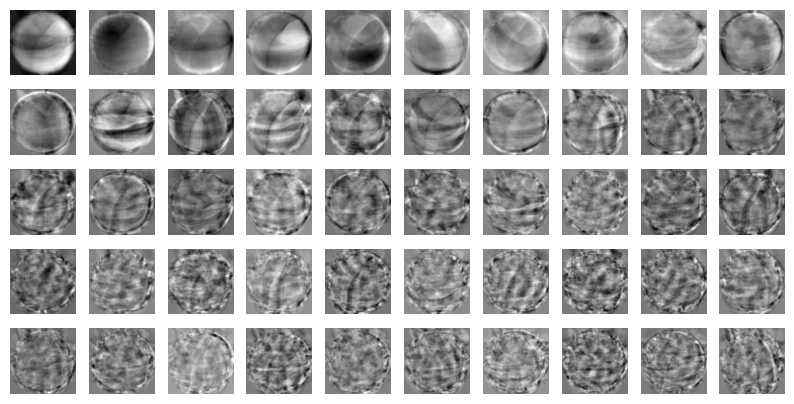

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에 분산이 큰 방향을 순서대로 나타낸 것이다. 한 편으로는 데이터 셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다. 이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 잇다. PCA에서 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여보자

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d 는 (300, 10000)의 크기의 배열이었다. 10,000개의 픽셀(특성)을 가진 300개의 이미지이다. 50개의 주성분을 찾은 PCA모델을 사용해 이를 (300,50) 크기의 배열로 변환했다. 이제 fruits_pca 배열은 50개의 특성을 가진 데이터이다.

데이터를 성공적으로 줄였다. 무려 1/200로 줄어들었다. fruits_2d 대신 fruits_pca를 저장한다면 훨씬 공간을 줄일 수 있다. 데이터의 차원을 줄였다면 다시 원상 복구할 수도 있을까?

#원본 데이터 재구성


앞에서 10000개의 특성을 50개로 줄였다. 이로 인해 어느정도 손실발생이 있을 수박에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기에 원본 데이터를 상당 부분 재구성할 수 있다. PCA 클래스는 이를 위해 inverse_transform()메서드를 제공한다. 앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개의 특성을 복원하겠다.

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


10000개의 특성이 복원되었다. 이 데이터를 100x100 크기로 바꾸어 100개씩 나누어 출력하겠다. ㅇ이 데이터는 순서대로 사과, 파인애플, 바나나를 100개씩 담고 있다.

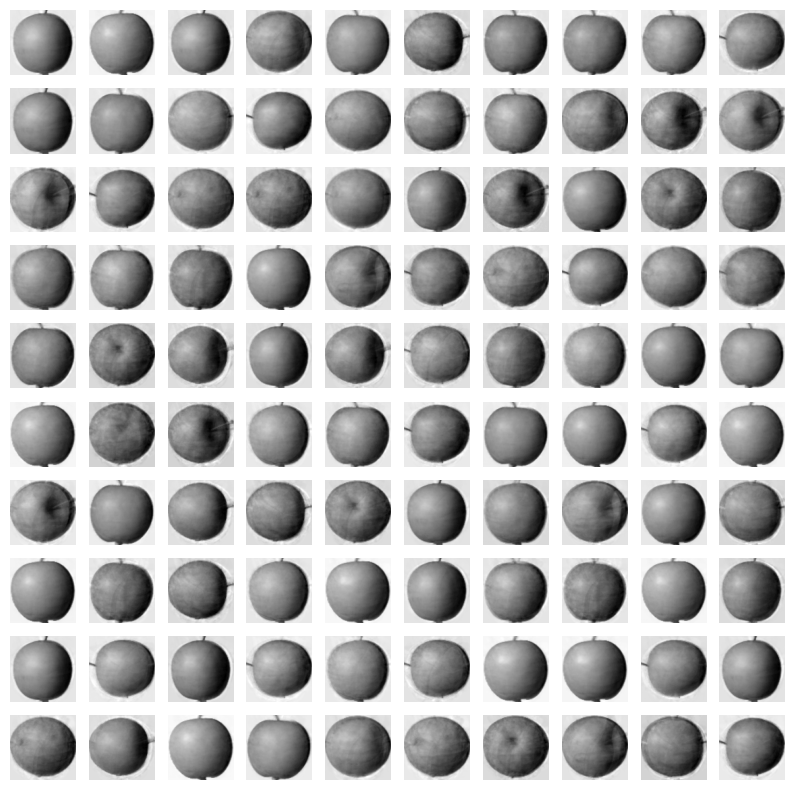

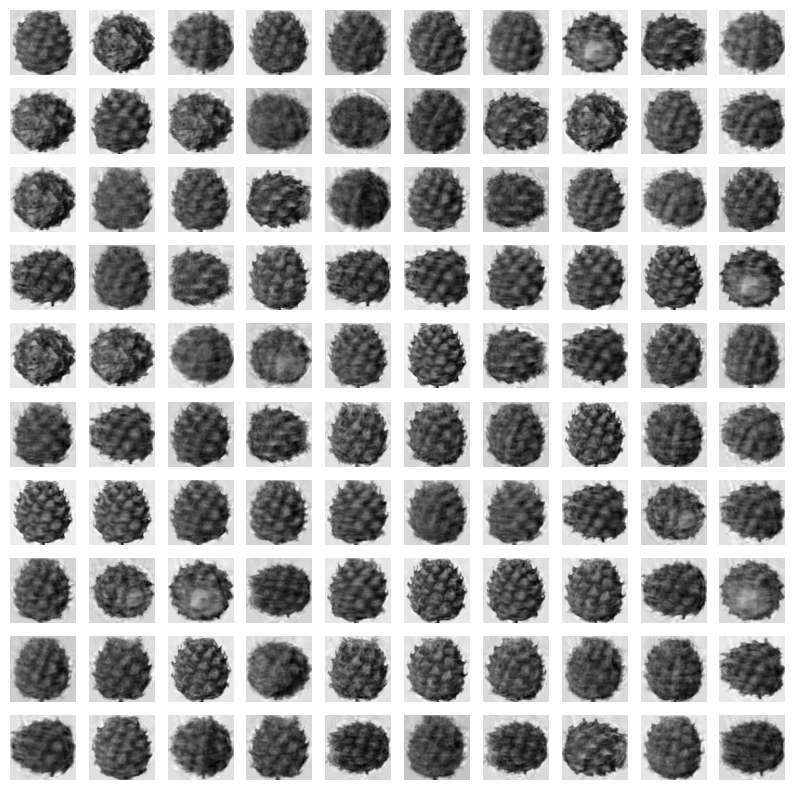

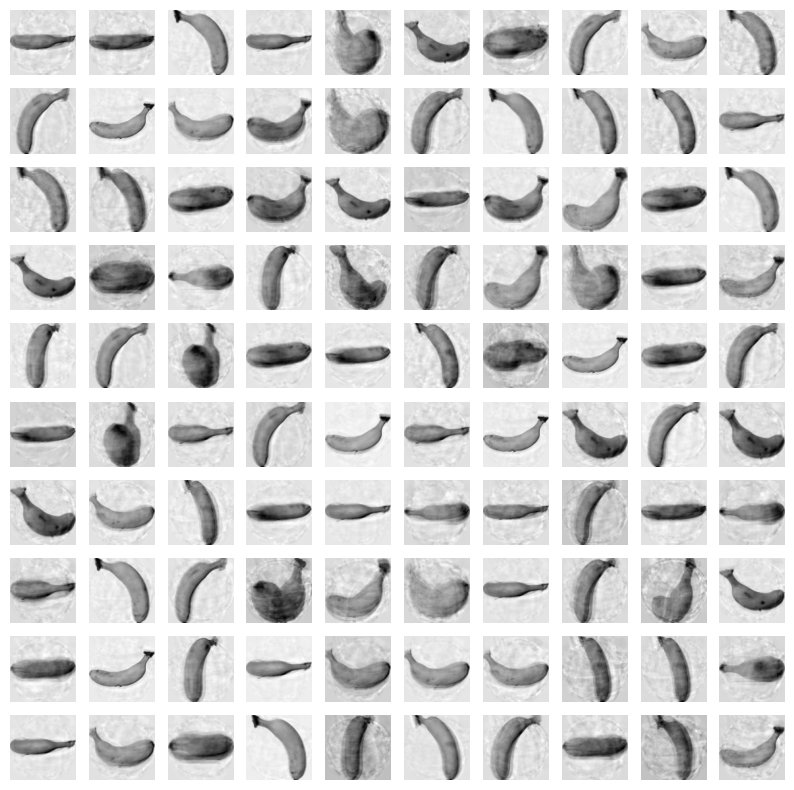

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200] :
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

와우! 거의 모든 과일이 잘 복원 되었다. 일부 흐리고 번진 부분이 있지만 불과 50개의 특성을 10,000개로 늘린 것을 감안한다면 놀라운 일이다. 이 40개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.

만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다. 그럼 50개의 특성을 얼마나 분산을 보존하고 있는 것일까? 다음을 통해 알아보자.

#설명된 분산


주성분이 원본 데이터를 얼마나 잘 나타내는지를 기록한 값을 설명된 분산explained varicance 라고 한다. PCA클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다. 당연히 첫 번쨰 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.9215891664705197


92%가 넘는 분산을 유지한다. 50개의 특성에서 복원햇을 때 이미지의 품질이 높앗던 이유가 여기 있다. 설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는데 도움이 된다.

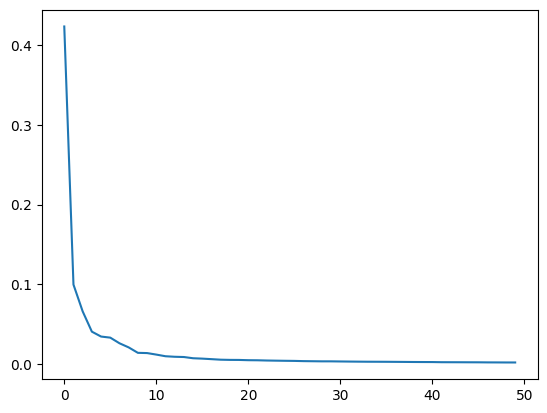

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그 다음부터 각 주성분이 설명하고 있는 분산은 비교적 작다. PCA로 차원 축소된 데이터를 사용하여 지도학습모델을 훈련하겠따. 원본 데이터를 사용했을 때 어떤 차이가 있는지 확인해보자


#다른 알고리즘과 함께 사용하기

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해보고 어떤 차이가 있는지 확인해보자.
3개의 과일 사진을 분류해야하기에 간단히 로지스틱 회귀 모델을 사용한다.

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

지도학습 모델 사용을 위해서는 타깃값이 있어야 한다. 사과 - 0, 파인애플 - 1, 바나나 - 2로 지정한다. 파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복한다.

In [13]:
target = np.array([0] * 100 + [1] * 100 + [2]*100)

먼저 원본 데이터는 fruits_2d를 사용해보자. 로지스틱 회귀 모델에서 성능 가늠을 위해 cross_validate()로 교차 검증을 수행한다.


In [15]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.643927526473999


In [16]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.05308442115783692


In [17]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [18]:
print(pca.n_components_)

2


In [19]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.02929229736328125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [21]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [22]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


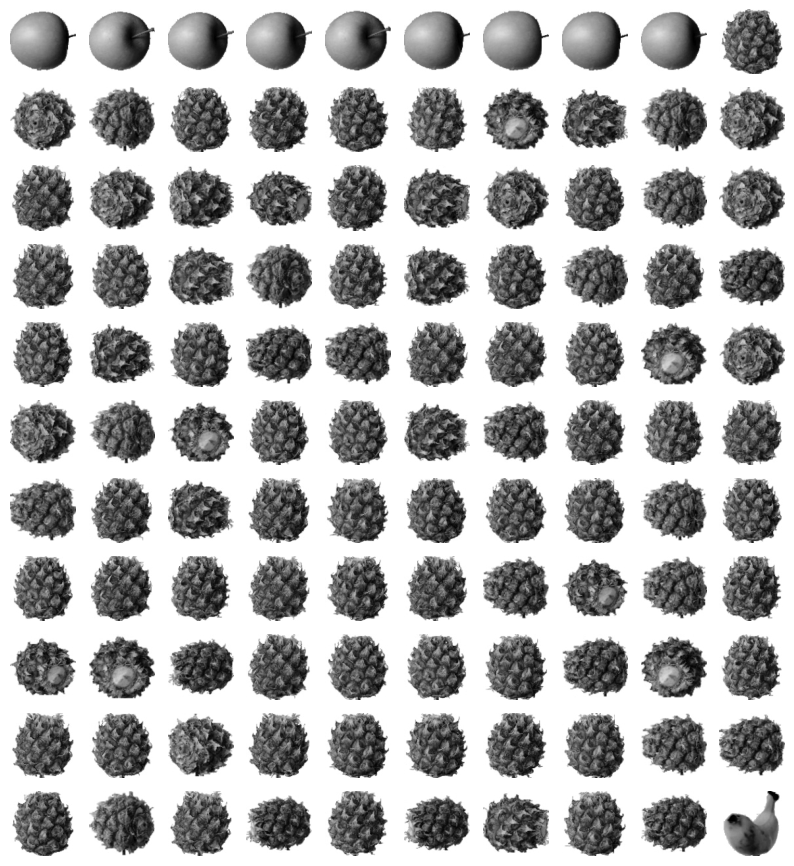

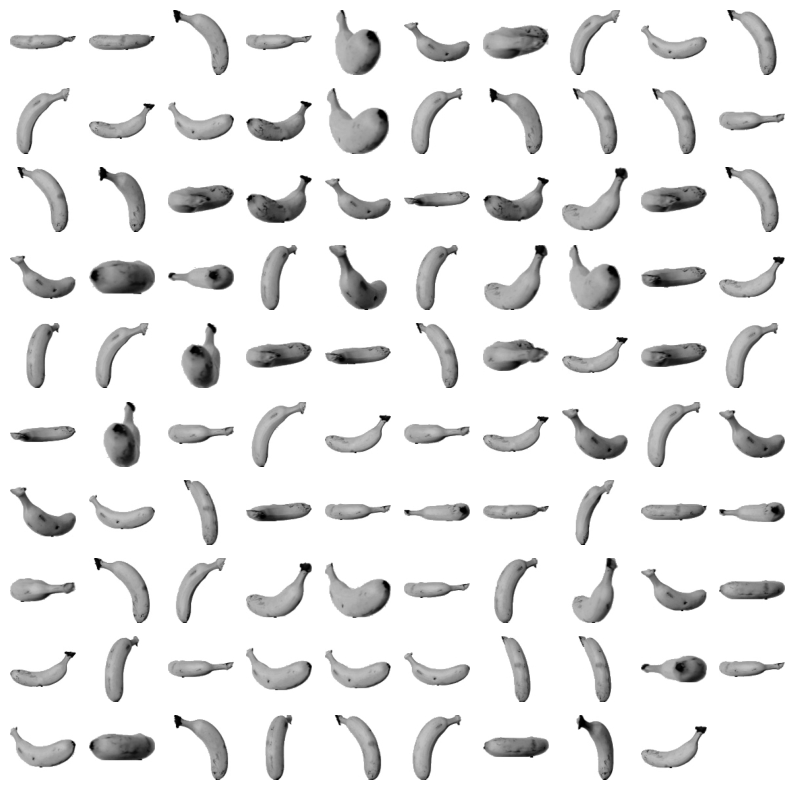

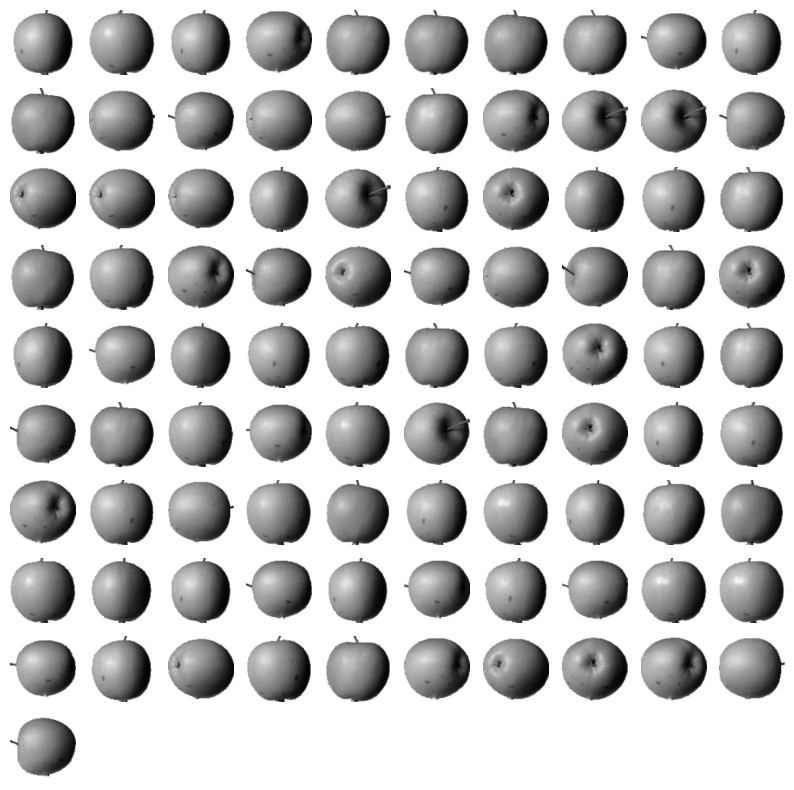

In [23]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

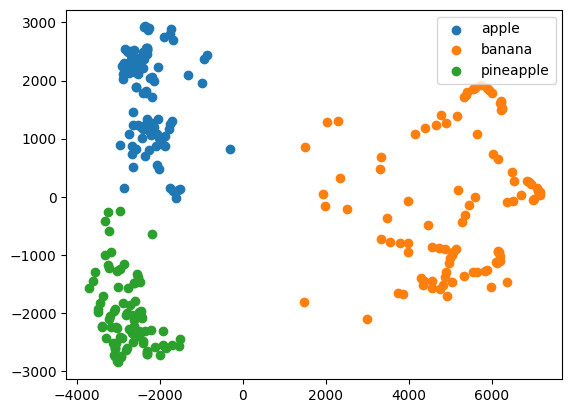

In [24]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()